In [1]:
from carbon.sdk import CarbonSDK, Tokens as T
#from carbon import CarbonOrderUI, CarbonSimulatorUI
from carbon.helpers.widgets import CheckboxManager, DropdownManager, PcSliderManager
from matplotlib import pyplot as plt
import numpy as np
print("{0.__name__} v{0.__VERSION__} ({0.__DATE__})".format(CarbonSDK))
!node --version

CarbonSDK v0.9 (11/Mar/2023)
v18.14.2


# Order Book [NB10]

_this notebook is showcasing key order-book related functions; the actual order book code is in NB11_

In order to start the server, please run

    source /Volumes/Private/bin/sdkserver
    node server/sdkserver.mjs

In [2]:
SDK = CarbonSDK(disclaimer=False, verbose=False, Tokens=T)
SDK.version().get("msg")

'Carbon SDK v0.9 (7/Mar/2022)'

## Order book related functions

#### `pairs`


In [3]:
pairs, pairs_s = SDK.pairs(inclstr=True)
pairs_s

'USDC/USDT, USDC/ETH, BNT/USDT, BNT/USDC, USDT/ETH, WBTC/USDC, DAI/MATIC, LINK/USDC, DAI/ETH, MKR/USDC, DAI/USDC, UNI/USDC, DAI/BNB'

In [4]:
try:
    pairs_sel = [s.strip() for s in pairs_s.split(",")]
    pairs_w()
except:
    pairs_w = DropdownManager(pairs_sel, defaultval="USDC/ETH")
    pairs_w()

Dropdown(index=1, options=(('USDC/USDT', 'USDC/USDT'), ('USDC/ETH', 'USDC/ETH'), ('BNT/USDT', 'BNT/USDT'), ('B…

In [5]:
try:
    inverse_w()
except:
    inverse_w = CheckboxManager(["inverse"], values=[1])
    inverse_w()

In [6]:
tknb,tknq = pairs_w.value.split("/")
if inverse_w.values[0]:
    tknb,tknq = tknq, tknb
pair = f"{tknb}/{tknq}"
pair

'ETH/USDC'

#### `mHasLiquidityByPair` and `mHasLiquidityByPairs`

In [7]:
help(SDK.mHasLiquidityByPair)

Help on method mHasLiquidityByPair in module carbon.sdk.carbonsdk:

mHasLiquidityByPair(pair, AMMsells) method of carbon.sdk.carbonsdk.CarbonSDK instance
    whether a specfic pair has any open liquidity positions
    
    :pair:          pair (as CarbonPair object)
    :AMMsells:      the token the AMM sells (as token name)
    :returns:       whether the directed pair has liquidity (boolean)



In [8]:
help(SDK.mHasLiquidityByPairs)

Help on method mHasLiquidityByPairs in module carbon.sdk.carbonsdk:

mHasLiquidityByPairs(pairs) method of carbon.sdk.carbonsdk.CarbonSDK instance
    whether a list of pairs has any open liquidity positions in any direction
    
    :pairs:     list of pairs (as CarbonPair objects or slashpair strings),
                or a string of slashpairs separeted by commas



In [9]:
SDK.mHasLiquidityByPair(pair=pair, AMMsells=tknb)

True

In [10]:
SDK.mHasLiquidityByPairs(pairs=pair)

({'pair': P('ETH/USDC'), 'AMMsells': 'USDC', 'hasLiquidity': True},
 {'pair': P('ETH/USDC'), 'AMMsells': 'ETH', 'hasLiquidity': True})

In [11]:
SDK.mHasLiquidityByPairs(pairs="ETH/USDC, WBTC/USDC, WBTC/BNT")

({'pair': P('ETH/USDC'), 'AMMsells': 'USDC', 'hasLiquidity': True},
 {'pair': P('ETH/USDC'), 'AMMsells': 'ETH', 'hasLiquidity': True},
 {'pair': P('WBTC/USDC'), 'AMMsells': 'USDC', 'hasLiquidity': True},
 {'pair': P('WBTC/USDC'), 'AMMsells': 'WBTC', 'hasLiquidity': True},
 {'pair': P('WBTC/BNT'), 'AMMsells': 'BNT', 'hasLiquidity': False},
 {'pair': P('WBTC/BNT'), 'AMMsells': 'WBTC', 'hasLiquidity': False})

#### `mGetLiquidityByPair`

In [12]:
help(SDK.mGetLiquidityByPair)

Help on method mGetLiquidityByPair in module carbon.sdk.carbonsdk:

mGetLiquidityByPair(pair, AMMsells) method of carbon.sdk.carbonsdk.CarbonSDK instance
    liquidity values for multiple pairs
    
    :pair:          pair (as CarbonPair object or slashpair string)
    :AMMsells:      the token the AMM sells (as token name)
    :returns:       RangeByPair object



In [13]:
(SDK.mGetLiquidityByPair(pair=pair, AMMsells=tknb),
 SDK.mGetLiquidityByPair(pair=pair, AMMsells=tknq))

(CarbonSDK.PairLiquidity(amount=2156.036407671459, unit='ETH', AMMsells='ETH', bidAsk='ask', pair=P('ETH/USDC'), rate=None, inverted=None, islist=None),
 CarbonSDK.PairLiquidity(amount=2498052.640732, unit='USDC', AMMsells='USDC', bidAsk='bid', pair=P('ETH/USDC'), rate=None, inverted=None, islist=None))

In [14]:
SDK.mGetLiquidityByPair(pair="WBTC/BNT", AMMsells="BNT")

CarbonSDK.PairLiquidity(amount=0.0, unit='BNT', AMMsells='BNT', bidAsk='bid', pair=P('WBTC/BNT'), rate=None, inverted=None, islist=None)

#### `mGetRangeByPair`


In [15]:
help(SDK.mGetRangeByPair)

Help on method mGetRangeByPair in module carbon.sdk.carbonsdk:

mGetRangeByPair(pair, AMMsells) method of carbon.sdk.carbonsdk.CarbonSDK instance
    gets the minimum and maximum exchange rate offered on Carbon between those two tokens
    
    :pair:          pair (as CarbonPair object or slashpair string)
    :AMMsells:      the token the AMM sells (as token name)
    :returns:       RangeByPair object



In [16]:
(SDK.mGetRangeByPair(pair=pair, AMMsells=tknb),
 SDK.mGetRangeByPair(pair=pair, AMMsells=tknq))

(CarbonSDK.RangeByPair(startRate=1630.0000000000148, endRate=3000.0000000000327, AMMsells='ETH', AMMbuys='USDC', bidAsk='ask', pair=P('ETH/USDC'), inverted=False),
 CarbonSDK.RangeByPair(startRate=1599.9999998788553, endRate=799.9999998679182, AMMsells='USDC', AMMbuys='ETH', bidAsk='bid', pair=P('ETH/USDC'), inverted=True))

#### `mGetRateLiquidityDepthByPair`

In [17]:
help(SDK.mGetRateLiquidityDepthByPair)

Help on method mGetRateLiquidityDepthByPair in module carbon.sdk.carbonsdk:

mGetRateLiquidityDepthByPair(rate, pair, AMMsells) method of carbon.sdk.carbonsdk.CarbonSDK instance
    liquidity depth (ie cumulative liquidity) at a given exchange rate
    
    :rate:          rate at which liquidity is evaluated (in units of the pair)
                    if the rate is an Array then the liquidity is evaluated at each rate
    :pair:          pair (as CarbonPair object or slashpair string)
    :AMMsells:      the token the AMM sells (as token name)
    :returns:       RangeByPair object; if rate is an Array so is the amount



In [18]:
SDK.mGetRateLiquidityDepthByPair(rate=2400, pair=pair, AMMsells=tknb)

CarbonSDK.PairLiquidity(amount=1807.168452051181, unit='ETH', AMMsells='ETH', bidAsk='ask', pair=P('ETH/USDC'), rate=2400, inverted=True, islist=False)

CarbonSDK.PairLiquidity(amount=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 161.085113, 485.765878, 813.882705, 2300.783703, 5297.691712, 8328.466315, 11394.282267, 14496.383853, 17636.090791, 24013.369242, 276979.197371, 914777.271112, 1402473.224138, 1417592.815531, 1432926.90136, 1448484.877991, 1464276.848555, 1480313.699691, 1494695.241651, 1495819.259816, 1496962.496144, 1517888.473298, 1838382.59119, 2164983.005483, 2498052.639371], unit='USDC', AMMsells='USDC', bidAsk='bid', pair=P('ETH/USDC'), rate=array([2400.        , 2367.34693878, 2334.69387755, 2302.04081633,
       2269.3877551 , 2236.73469388, 2204.08163265, 2171.42857143,
       2138.7755102 , 2106.12244898, 2073.46938776, 2040.81632653,
       2008.16326531, 1975.51020408, 1942.85714286, 1910.20408163,
       1877.55102041, 1844.89795918, 1812.24489796, 1779.59183673,
       1746.93877551, 1714.28571429, 1681.63265306, 1648.97959184,
    

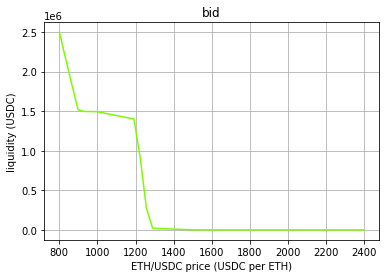

In [19]:
r = SDK.mGetRateLiquidityDepthByPair(rate=np.linspace(2400, 800), pair=pair, AMMsells=tknq)
plt.plot(r.rate, r.amount, color="red" if r.bidAsk=="ask" else "lawngreen")
plt.xlabel(f"{r.pair.slashpair} price ({r.pair.price_convention})")
plt.ylabel(f"liquidity ({r.unit})")
plt.title(r.bidAsk)
plt.grid()
r

CarbonSDK.PairLiquidity(amount=[1807.168452051181, 1807.168452051181, 1807.168452051181, 1807.168452051181, 1807.168452051181, 1807.168452051181, 1807.168452051181, 1807.168452051181, 1807.168452051181, 1815.4778644569037, 1825.382526860023, 1835.2153293843426, 1844.977136772619, 1854.6687992688655, 1864.2911529294097, 1873.8450199258368, 1883.3312088400621, 1892.5923469688241, 1901.709687821507, 1910.7633451245842, 1919.7540568125899, 1928.6825489041112, 1937.5495357480472, 1946.3557202636664, 1955.1017941746666, 1963.788438237396, 1972.4163224634158, 1980.9861063365693, 1989.4984390247116, 1997.9539595862616, 2006.3532971717177, 2014.6970712202901, 2022.9858916517808, 2031.220359053852, 2039.4010648648107, 2047.5285915520362, 2055.6035127861755, 2063.6263936112186, 2071.597790610574, 2079.5182520692547, 2087.3883181322767, 2095.2085209593806, 2102.979384876174, 2110.701426521791, 2118.375154993161, 2126.0010719859906, 2133.5796719325276, 2141.111442136213, 2148.5968629032864, 2156.03

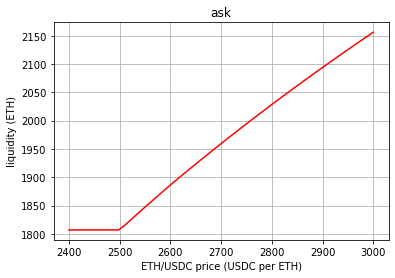

In [20]:
r = SDK.mGetRateLiquidityDepthByPair(rate=np.linspace(2400, 3000), pair=pair, AMMsells=tknb)
plt.plot(r.rate, r.amount, color="red" if r.bidAsk=="ask" else "lawngreen")
plt.xlabel(f"{r.pair.slashpair} price ({r.pair.price_convention})")
plt.ylabel(f"liquidity ({r.unit})")
plt.title(r.bidAsk)
plt.grid()
r

#### `mGetMarketByPair`

The `mGetMarketByPair` endpoint is a summary endpoint allowing to retrieve key market information for a single pair at once. Note that the returned `MarketByPair` contains numerous properties over and beyond the primary data in the class.

In [21]:
#help(SDK.mGetMarketByPair)

In [22]:
#help(SDK.MarketByPair)

In [23]:
m = SDK.mGetMarketByPair(pair=pair)
m

CarbonSDK.MarketByPair(pair='ETH/USDC', bestBid=1599.9999998788553, bestAsk=1630.0000000000148, liqBid=2498052.640732, liqAsk=2156.036407671459, lastBid=799.9999998679182, lastAsk=3000.0000000000327)

In [24]:
m.cpair, m.price_convention

(P('ETH/USDC'), 'USDC per ETH')

In [25]:
m.mid, m.spread, m.spreadpc, m.inverted

(1614.999999939435, 30.000000121159474, 0.018575851468906824, False)

In [26]:
m.liqBid, m.liqBidUnit, m.bidAMMSells, m.bidTraderSells 

(2498052.640732, 'USDC', 'USDC', 'ETH')

In [27]:
m.liqAsk, m.liqAskUnit, m.askAMMSells, m.askTraderSells 

(2156.036407671459, 'ETH', 'ETH', 'USDC')